# Heart disease classification project

In this project based on some clinical parameters we try to predict if a person is affected with heart disease or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv("heart-disease (1).csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


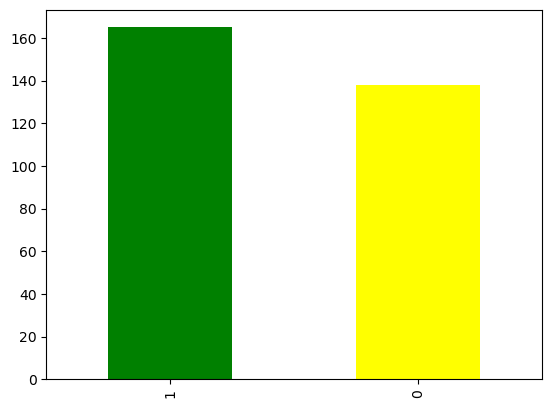

In [3]:
data["target"].value_counts().plot(kind="bar", color=["green", "yellow"]);

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart disease frequency according to gender of a person

Text(0.5, 1.0, 'Heart disease variation with gender')

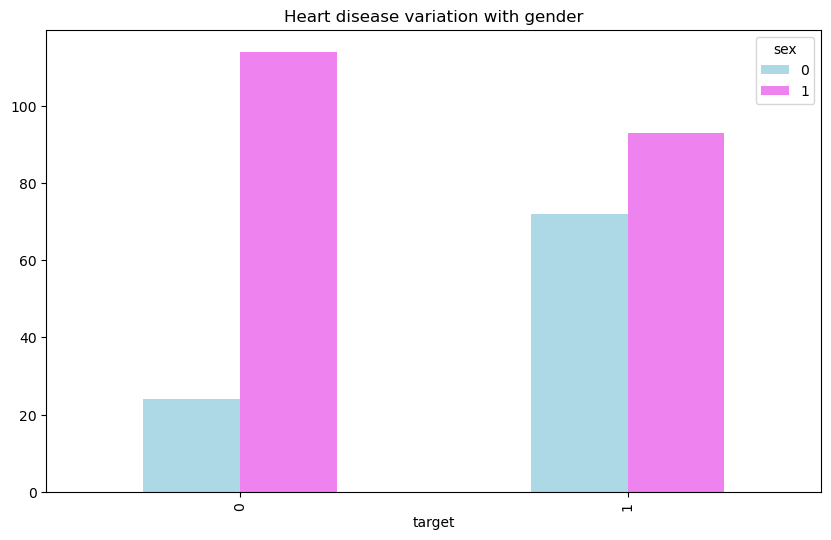

In [6]:
pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,6),color=["lightblue","violet"])
plt.title("Heart disease variation with gender")

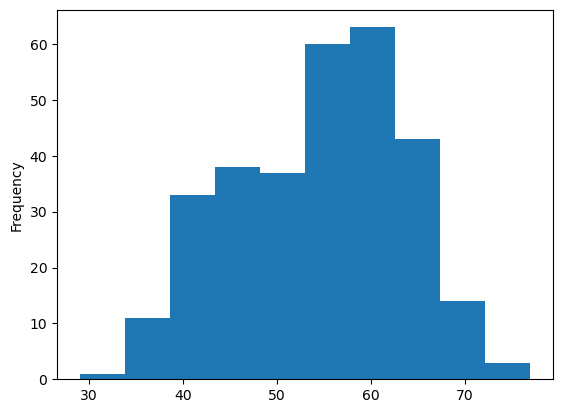

In [7]:
data.age.plot(kind="hist" );

In [8]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


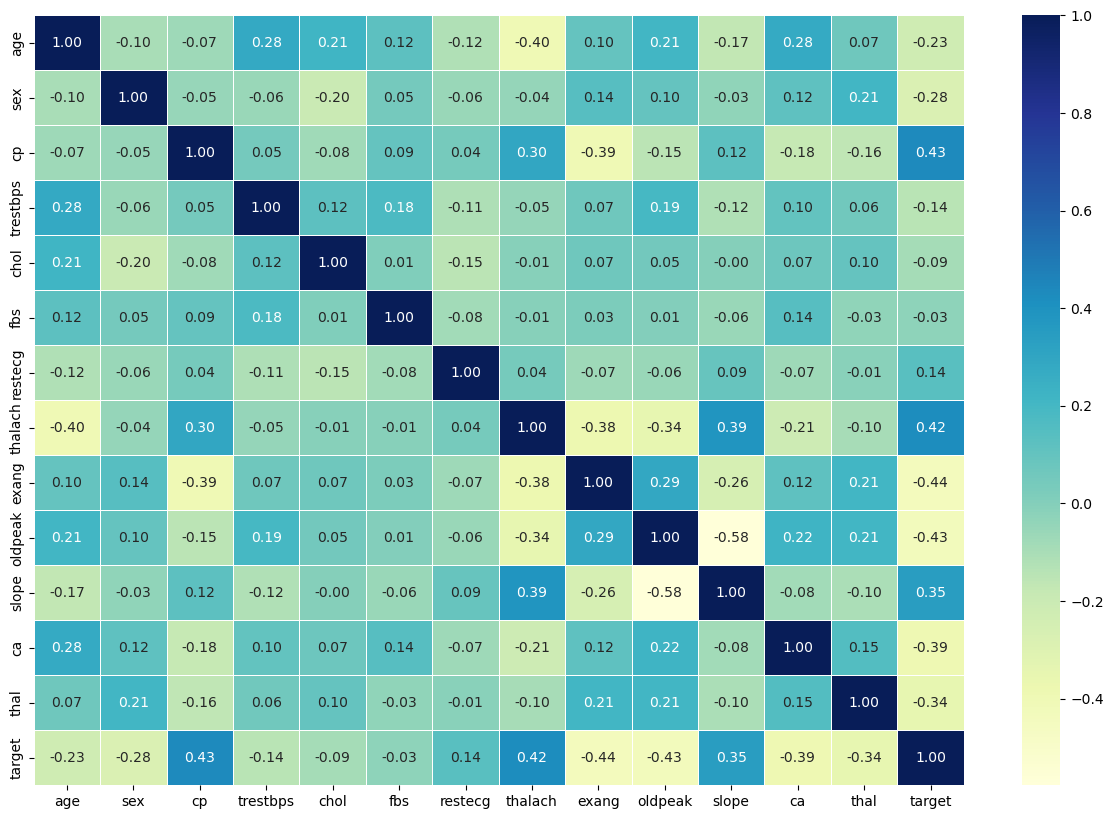

In [9]:
cor_mat = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cor_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

Modelling

In [10]:
X = data.drop("target",axis=1)
y = data["target"]

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
np.random.seed(42) 
model = {"Randomforest":RandomForestClassifier(),
          "KNN":KNeighborsClassifier(),
           "LRegression": LogisticRegression()}
    
def fit(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [14]:
model_scores = fit(models=model,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

{'Randomforest': 0.7540983606557377,
 'KNN': 0.6229508196721312,
 'LRegression': 0.7377049180327869}

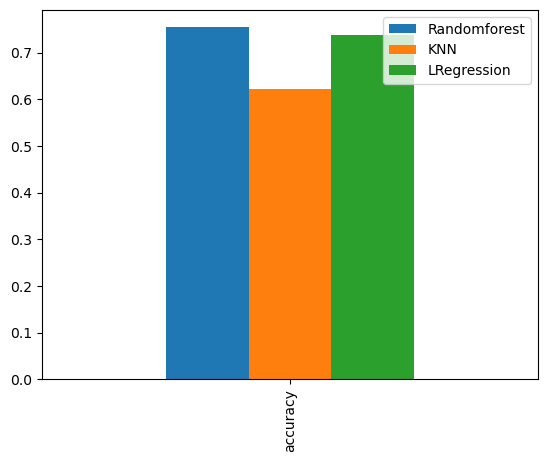

In [15]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();

Hyperparameter tuning 

In [16]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

In [17]:
train_scores

[1.0,
 0.8223140495867769,
 0.7851239669421488,
 0.768595041322314,
 0.78099173553719,
 0.7603305785123967,
 0.7396694214876033,
 0.71900826446281,
 0.7148760330578512,
 0.7024793388429752,
 0.7272727272727273,
 0.7272727272727273,
 0.7148760330578512,
 0.6942148760330579,
 0.7024793388429752,
 0.6900826446280992,
 0.6776859504132231,
 0.6859504132231405,
 0.6818181818181818,
 0.6735537190082644]

In [18]:
test_scores

[0.5737704918032787,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.5409836065573771,
 0.6557377049180327,
 0.6065573770491803,
 0.5901639344262295,
 0.5737704918032787,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6065573770491803,
 0.5409836065573771,
 0.5901639344262295,
 0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.6557377049180327]

Maximum KNN score on the test data: 65.57%


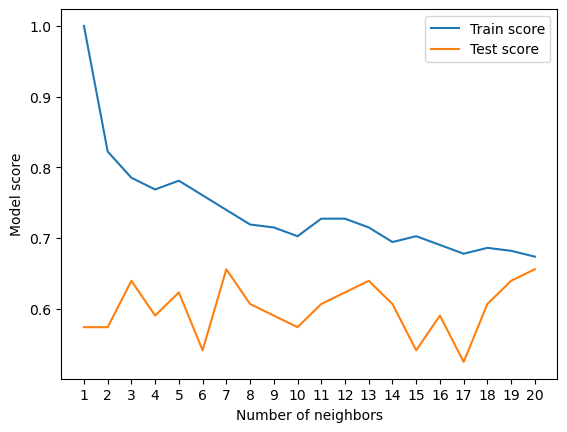

In [19]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Parameter tuning with RandomisedsearchCV for
1.logistic Regression
2.Randomforest

In [20]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [21]:
np.random.seed(40)

rsv_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=False)
rsv_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=False)

In [22]:
rsv_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [23]:
rsv_log_reg.score(X_test,y_test)

0.7540983606557377

In [29]:
# Setup random seed
np.random.seed(40)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)


rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test,y_test)

0.7704918032786885

## Grid search CV 

In [32]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [33]:
gs_log_reg.score(X_test, y_test)

0.7540983606557377

## Evaluating the model 

In [34]:
y_preds = gs_log_reg.predict(X_test)

In [35]:
y_preds

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

C:\Users\S KUGAPRIA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


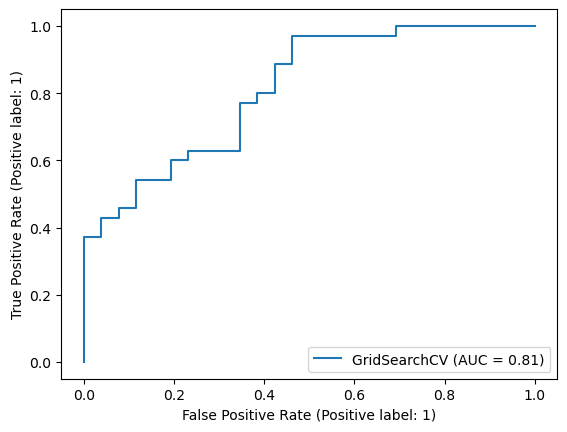

In [36]:
plot_roc_curve(gs_log_reg, X_test, y_test)

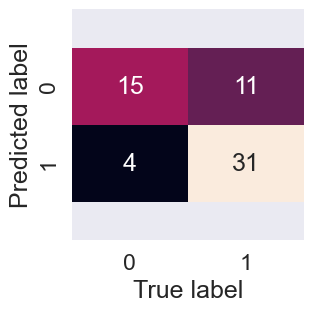

In [37]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        26
           1       0.74      0.89      0.81        35

    accuracy                           0.75        61
   macro avg       0.76      0.73      0.74        61
weighted avg       0.76      0.75      0.75        61



In [40]:
gs_log_reg.best_params_


{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [44]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [45]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [46]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [47]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

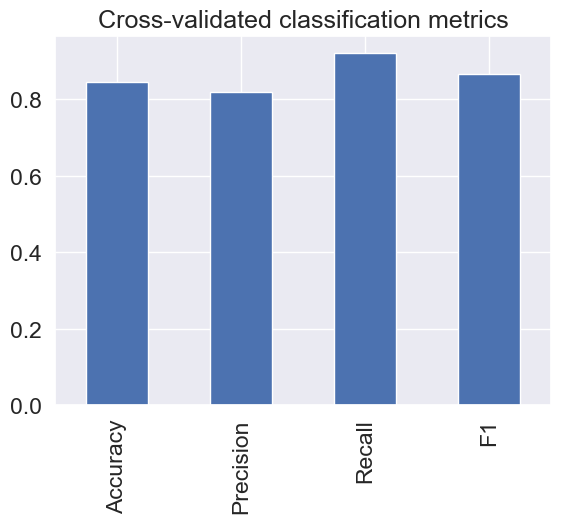

In [48]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Finding which feauture contributed the most 

In [50]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

## gives corelation betweeen independant and target variables
clf.coef_

array([[ 0.00730874, -0.94117208,  0.7682309 , -0.01993006, -0.00353403,
        -0.07359335,  0.06959067,  0.03383226, -0.59610032, -0.37606734,
         0.46614761, -0.7587994 , -0.69907885]])

In [52]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict


{'age': 0.007308740222219034,
 'sex': -0.9411720819165902,
 'cp': 0.7682308962064474,
 'trestbps': -0.019930056778467934,
 'chol': -0.0035340262678135786,
 'fbs': -0.07359335056424095,
 'restecg': 0.06959067320106634,
 'thalach': 0.03383225749179084,
 'exang': -0.5961003160034821,
 'oldpeak': -0.37606733557904326,
 'slope': 0.4661476103510978,
 'ca': -0.7587994005494759,
 'thal': -0.6990788456077247}

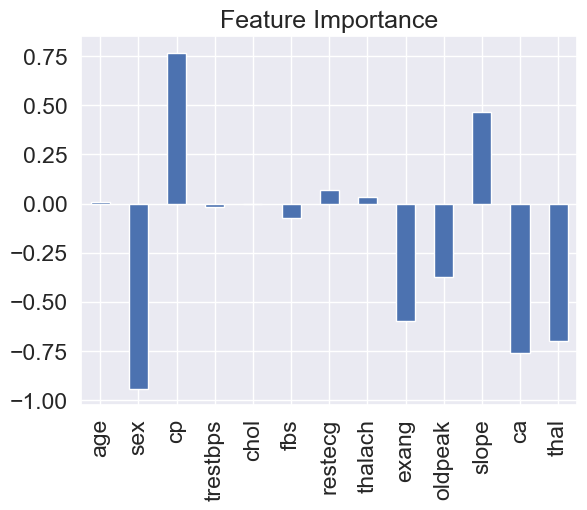

In [53]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);